In [178]:
import pandas as pd
import yfinance as yf

In [2]:
import yfinance as yf
Ticker="NFLX"

In [4]:
df=yf.download(Ticker,period='3y')
df.to_csv(''+Ticker+'netflix.csv')

C:\Users\muhammad waseem\AppData\Local\Temp\ipykernel_19552\669727553.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(Ticker,period='3y')
[*********************100%***********************]  1 of 1 completed


In [181]:
df.columns


MultiIndex([( 'Close', 'NFLX'),
            (  'High', 'NFLX'),
            (   'Low', 'NFLX'),
            (  'Open', 'NFLX'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])

In [182]:
df.shape

(752, 5)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-07-14 to 2025-07-14
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NFLX)   752 non-null    float64
 1   (High, NFLX)    752 non-null    float64
 2   (Low, NFLX)     752 non-null    float64
 3   (Open, NFLX)    752 non-null    float64
 4   (Volume, NFLX)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


In [ ]:
df.rename(columns={'(High, NFLX)':'high'},inplace=True)


Price,Close,High,Low,Open,Volume
Ticker,NFLX,NFLX,NFLX,NFLX,NFLX
Date,,,,,
2022-07-14,174.779999,177.520004,171.820007,175.559998,9039500
2022-07-15,189.110001,189.220001,174.559998,175.580002,16319100
2022-07-18,190.919998,199.669998,189.800003,192.500000,16322800
2022-07-19,201.630005,201.970001,188.399994,193.020004,28178700
2022-07-20,216.440002,216.970001,200.100006,208.169998,53920300
...,...,...,...,...,...
2025-07-08,1275.310059,1293.250000,1260.000000,1290.900024,3292500
2025-07-09,1288.280029,1288.290039,1266.239990,1273.989990,2384500


In [185]:
close_df=df['Close']
reset_index=close_df['NFLX'].reset_index()

In [186]:
df_c1=reset_index.rename(columns={'NFLX':'close'})
df_c1['Date'] = pd.to_datetime(df_c1['Date'])

In [187]:
df_c=reset_index.rename(columns={'NFLX':'close'})
df_c

,Date,close
0,2022-07-14,174.779999
1,2022-07-15,189.110001
2,2022-07-18,190.919998
3,2022-07-19,201.630005
4,2022-07-20,216.440002
...,...,...
747,2025-07-08,1275.310059
748,2025-07-09,1288.280029
749,2025-07-10,1250.589966
750,2025-07-11,1245.109985


In [188]:
df_c.set_index('Date',inplace=True)

<Axes: xlabel='Date'>

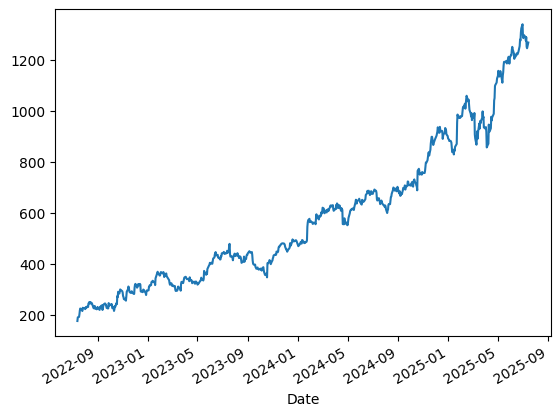

In [189]:
df_c.close.plot()

[]

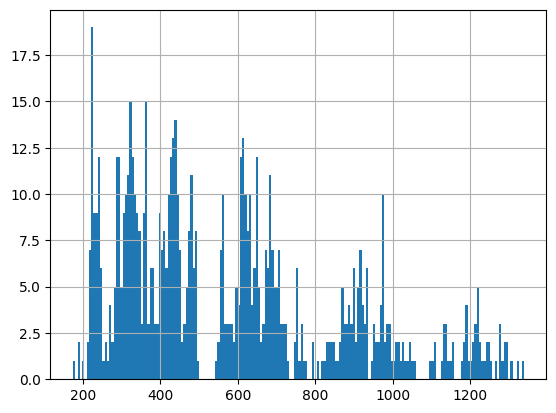

In [190]:
df_c.close.hist(bins=200).plot()

In [191]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-07-14 to 2025-07-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   752 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


In [192]:
df_c.to_csv('dataset_close.csv')

In [193]:
print(df_c.close.quantile(0.025))

print(df_c.close.quantile(0.975))

224.30599937438964
1226.7134887695313


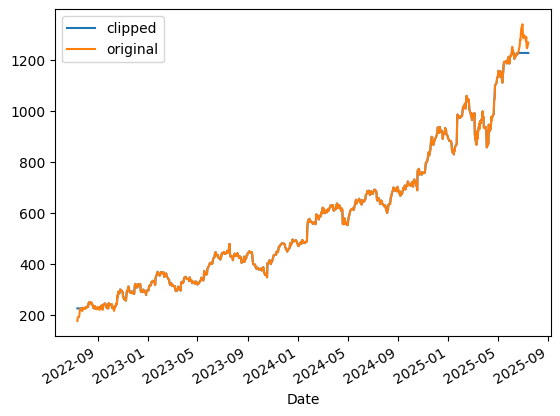

In [194]:
import matplotlib.pyplot as plt
df_c.close.clip(lower=df_c.close.quantile(0.025), upper=df_c.close.quantile(0.975)).plot(label='clipped')
df_c.close.plot(label='original')
plt.legend()

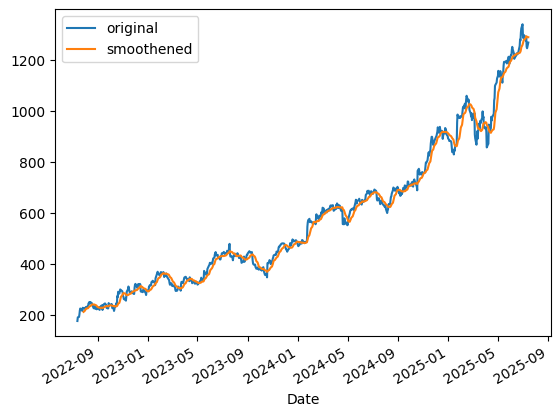

In [195]:
df_c.close.plot(label='original')
df_c.close.rolling(window=12).mean().plot(label='smoothened')
plt.legend()

In [196]:
df_c1=df_c1.set_index('Date',inplace=True)
df_c1=df_c1.asfreq('D')

AttributeError: 'NoneType' object has no attribute 'asfreq'

In [ ]:
df_c1[df_c1.Date.isna()]

# df_c1=df_c1.drop(-1)
if df_c1.iloc[-1].isna().any():
    df_c1 = df_c1.drop(df_c1.index[-1])

In [ ]:
df_c1.Date.isna()

Series([], Freq: D, Name: Date, dtype: bool)

In [ ]:
##seasonality types - additive and multiplicative
#when a seasonal component is added to the trend its called additive seasonality
import statsmodels.api as sm
model = sm.tsa.seasonal_decompose(df_c1.close, model='multiplicative')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None